# Development notebook for visualizing inferred bathymetries

by Jessica Scheick

Workflow based on previous methods and code developed by JScheick for Scheick et al 2019 *Remote Sensing*.

***Important note about CRS handling*** This code was developed while also learning about Xarray, rioxarray, rasterio, and other Python geospatial libraries. Since projections are not yet fully handled [smoothly] in any of those resources, and especially not integrated, there's little to no built in checking or handling of CRS. Instead, handling is done manually throughout the code and external to this notebook. This is critical to know because the CRS displayed by a rioxarray dataset may be from one variable added to the dataset, but is not necessarily the original (or read in) CRS for each variable in the dataset (hence the manual, external handling). The `get_mask` and `get_new_var_from_file` methods should reproject new data sources before adding them to the dataset.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
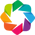

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
%matplotlib inline
import hvplot.xarray
# import hvplot.pandas
import holoviews as hv
hv.extension('bokeh','matplotlib')
from holoviews import dim, opts
import datetime as dt
import os
import panel as pn
pn.extension()
import pyproj
import rioxarray

In [2]:
%load_ext autoreload
import icebath as icebath
from icebath.core import build_xrds
from icebath.utils import raster_ops as raster_ops
from icebath.utils import vector_ops as vector_ops
from icebath.core import fl_ice_calcs as icalcs
from icebath.core import build_gdf
%autoreload 2

## Read in inferred water depths

In [3]:
outdir = "/Users/jessica/projects/bathymetry_from_bergs/results/"
resfile = [f for f in os.listdir(outdir) if f.endswith('_combined_results.gpkg')][0]
print(resfile)

KB_combined_results.gpkg


In [4]:
gdf = gpd.read_file(outdir+resfile, ignore_index=True)

In [5]:
gdf.head() #[gdf['date'].dt.year.astype(int)==2016]

sl_adjust fjord                 date  tidal_ht_offset  tidal_ht_min  \
0  -6.277611    KB  2017-04-07T20:13:02        -1.509651     -1.589897   
1  -5.525033    KB  2017-04-07T20:13:02        -1.509651     -1.589897   
2  -5.769626    KB  2017-04-07T20:13:02        -1.509651     -1.589897   
3  -5.053961    KB  2017-04-07T20:13:02        -1.509651     -1.589897   
4  -5.275876    KB  2017-04-07T20:13:02        -1.509651     -1.589897   

   tidal_ht_max  filtered_draft_med  filtered_draft_max  filtered_draft_mad  \
0       1.63429          164.309298          210.031004           18.178354   
1       1.63429          147.169452          171.817207            9.116229   
2       1.63429          151.575223          174.816824            9.449623   
3       1.63429          160.719779          188.107043           13.137501   
4       1.63429          165.324337          219.974340           27.033800   

   filtered_draft_err  bergkey  bmach_bed  bmach_errbed  bmach_source  \
0           32.217164      0.0     -189.0         200.0           4.0   
1           29.450576      1.0     -190.0         200.0           4.0   
2           30.156232      2.0     -189.0         200.0           4.0   
3           31.633232      3.0     -191.0         200.0           4.0   
4           32.382683      4.0     -190.0         200.0           4.0   

    ibcao_bed  ibcao_source                                           geometry  
0 -196.543753          70.0  POLYGON ((-381160.000 -1049408.673, -381160.00...  
1 -196.480110          70.0  POLYGON ((-382512.004 -1049345.925, -382510.74...  
2 -196.428808          70.0  POLYGON ((-381940.000 -1048885.941, -381938.62...  
3 -196.865572          70.0  POLYGON ((-384093.437 -1048842.585, -384096.69...  
4 -196.682836          70.0  POLYGON ((-383716.000 -1048687.409, -383716.00...

## Plot the measured and inferred values
Plots the gridded versus iceberg-freeboard-inferred values for all icebergs relative to the values in BedMachine and IBCAO.

Left plot shows measured values within the gridded datasets; right plot show the modeled/inferred values within the gridded data products (hence the larger error bars).

In [6]:
from icebath.utils import plot as ibplot

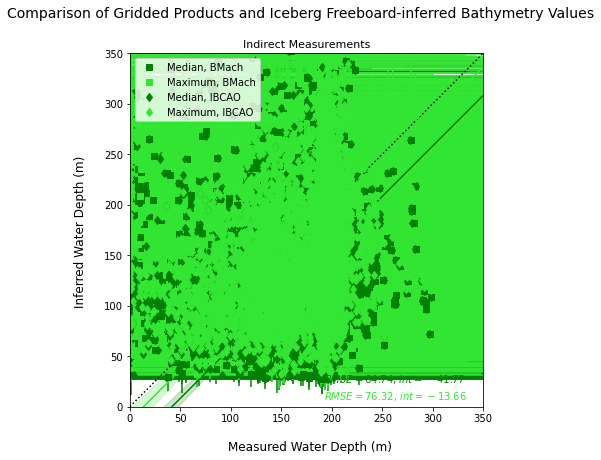

In [7]:
ibplot.meas_vs_infer_fig(gdf, save=False)

## Construct a contour map utilizing the results and gridded product data

### Create an Xarray dataset with the gridded products (BedMachine, IBCAO)

***Improvement: add CRS handling/checks to catch when a measurement dataset is incompatible and needs to be reprojected***

#### BedMachine Greenland

In [8]:
measfile='/Users/jessica/mapping/datasets/160281892/BedMachineGreenland-2017-09-20.nc'
# measfile='/Users/jessica/mapping/datasets/160281892/BedMachineGreenland-2017-09-20_3413_'+ds.attrs['fjord']+'.nc'
# measfile='/home/jovyan/icebath/notebooks/supporting_docs/160281892/BedMachineGreenland-2017-09-20.nc'
# measfile='/home/jovyan/icebath/notebooks/supporting_docs/160281892/BedMachineGreenland-2017-09-20_'+ds.attrs['fjord']+'.nc'

#### IBCAOv4
https://www.gebco.net/data_and_products/gridded_bathymetry_data/arctic_ocean/

Source keys: https://www.gebco.net/data_and_products/gridded_bathymetry_data/gebco_2020/

Downloaded Feb 2021

**NOTE** IBCAO has it's own Polar Stereo projection (EPSG:3996: WGS 84/IBCAO Polar Stereographic) so it needs to be reprojected before being applied to these datasets.
See: https://spatialreference.org/ref/?search=Polar+Stereographic

The variable name of one of the IBCAO input files must be changed during reprojection or it results in an error during merging.

In [9]:
measfile2a='/Users/jessica/mapping/datasets/IBCAO_v4_200m_ice_3413.nc'
# measfile2a='/Users/jessica/mapping/datasets/IBCAO_v4_200m_ice_3413_'+ds.attrs['fjord']+'.nc'
# measfile2a='/home/jovyan/icebath/notebooks/supporting_docs/IBCAO_v4_200m_ice_3413.nc'
# measfile2a='/home/jovyan/icebath/notebooks/supporting_docs/IBCAO_v4_200m_ice_3413_'+ds.attrs['fjord']+'.nc'
measfile2b='/Users/jessica/mapping/datasets/IBCAO_v4_200m_TID_3413.nc'
# measfile2b='/home/jovyan/icebath/notebooks/supporting_docs/IBCAO_v4_200m_TID_3413.nc'

#### Get the coordinates of BedMachine nearest the regional bounds

In [10]:
from icebath.core import berggdf as bgdf
# Kane region bbox
kanereg = (-552082, -1125990, -248996, -828936)
# bbox = (-552125, -1126025, -248975, -828875)
bbox = bgdf.get_needed_extent(measfile, kanereg)

#### Create the dataset

In [11]:
resds = build_xrds.read_netcdfs([measfile, measfile2a, measfile2b], extent=bbox)
resds = resds.squeeze(drop=True)
resds

<xarray.Dataset>
Dimensions:      (x: 2022, y: 1982)
Coordinates:
  * y            (y) float64 -8.289e+05 -8.29e+05 ... -1.126e+06 -1.126e+06
  * x            (x) float64 -5.521e+05 -5.52e+05 ... -2.491e+05 -2.49e+05
    mapping      int64 0
    spatial_ref  int64 0
Data variables:
    mask         (y, x) int8 ...
    surface      (y, x) int16 ...
    thickness    (y, x) int16 ...
    bed          (y, x) int16 ...
    errbed       (y, x) int16 ...
    source       (y, x) int8 ...
    geoid        (y, x) int16 ...
    ibcao_bathy  (y, x) float64 -237.0 -235.7 -234.2 ... 1.602e+03 1.603e+03
    z            (y, x) float64 41.0 41.0 41.0 41.0 41.0 ... 70.0 70.0 70.0 70.0
Attributes:
    author:                                             Mathieu Morlighem
    cdm_data_type:                                      Grid
    Conventions:                                        CF-1.6
    creator_email:                                      mathieu.morlighem@uci...
    creator_name:                                       Mathieu Morlighem
    Data_citation:                                      Morlighem M. et al., ...
    date_created:                                       20-Sep-2017 09:03:04
    institution:                                        Department of Earth S...
    keywords:                                           0720 Glaciers, 0726 I...
    keywords_vocabulary:                                AGU Index Terms
    license:                                            No restrictions on ac...
    Metadata_Conventions:                               CF-1.6, Unidata Datas...
    no_data:                                            -9999
    nx:                                                 18346
    ny:                                                 10218
    product_version:                                    v3.10
    proj4:                                              +init=epsg:3413
    Projection:                                         Polar Stereographic N...
    spacing:                                            150
    summary:                                            self-consistent bed/b...
    title:                                              BedMachine Greenland
    xmin:                                               -652925
    ymax:                                               -632675
    grid_mapping:                                       mapping
    ibcao_bathy#actual_range:                           [-5590.22070312  6141...
    ibcao_bathy#add_offset:                             0
    ibcao_bathy#coordinates:                            spatial_ref
    ibcao_bathy#grid_mapping:                           spatial_ref
    ibcao_bathy#long_name:                              z
    ibcao_bathy#scale_factor:                           1
    ibcao_bathy#_FillValue:                             nan
    NETCDF_DIM_band_DEF:                                [ 1. 10.]
    NETCDF_DIM_band_VALUES:                             1
    NETCDF_DIM_EXTRA:                                   {band}
    spatial_ref#crs_wkt:                                PROJCRS["WGS 84 / NSI...
    spatial_ref#false_easting:                          0
    spatial_ref#false_northing:                         0
    spatial_ref#geographic_crs_name:                    WGS 84
    spatial_ref#GeoTransform:                           -4060480.1666637915 2...
    spatial_ref#grid_mapping_name:                      polar_stereographic
    spatial_ref#horizontal_datum_name:                  World Geodetic System...
    spatial_ref#inverse_flattening:                     298.257223563
    spatial_ref#longitude_of_prime_meridian:            0
    spatial_ref#prime_meridian_name:                    Greenwich
    spatial_ref#projected_crs_name:                     WGS 84 / NSIDC Sea Ic...
    spatial_ref#reference_ellipsoid_name:               WGS 84
    spatial_ref#semi_major_axis:                        6378137
    spatial_ref#semi_minor_axis:                       

### Add the iceberg-inferred water depths

In [12]:
gdf['centroid'] = gdf.geometry.centroid
gdf['poly'] = gdf.geometry
gdf = gdf.drop(columns='geometry')
gdf.set_geometry(col="centroid", inplace=True)
gdf['geometry'] = gdf.centroid

In [13]:
from functools import partial
from geocube.api.core import make_geocube
from geocube.rasterize import rasterize_points_griddata, rasterize_points_radial, rasterize_image
from shapely.geometry import Point

Note: make_geocube does not recognize geometry columns not named "geometry". It also only works for point geometries [when rasterizing?], not polygons (hence the use of the centroid, computed above in the geodataframe).

There are multiple options for gridding the data, given by rasterize_function.

In [14]:
gdf_grid = make_geocube(vector_data=gdf,
                        measurements=["filtered_draft_med", "filtered_draft_err"],
                        like=resds,
                        fill=np.nan,
#                         rasterize_function=partial(rasterize_points_griddata, method="linear", filter_nan=True)
                        rasterize_function=partial(rasterize_image, filter_nan=True)
                       )

In [ ]:
gdf_grid.filtered_draft_med.plot()

In [15]:
resds["filtered_draft_med"] = gdf_grid.filtered_draft_med
resds["filtered_draft_err"] = gdf_grid.filtered_draft_err
del gdf_grid
resds

<xarray.Dataset>
Dimensions:             (x: 2022, y: 1982)
Coordinates:
  * y                   (y) float64 -8.289e+05 -8.29e+05 ... -1.126e+06
  * x                   (x) float64 -5.521e+05 -5.52e+05 ... -2.49e+05
    mapping             int64 0
    spatial_ref         int64 0
Data variables:
    mask                (y, x) int8 ...
    surface             (y, x) int16 ...
    thickness           (y, x) int16 ...
    bed                 (y, x) int16 ...
    errbed              (y, x) int16 ...
    source              (y, x) int8 ...
    geoid               (y, x) int16 ...
    ibcao_bathy         (y, x) float64 -237.0 -235.7 ... 1.602e+03 1.603e+03
    z                   (y, x) float64 41.0 41.0 41.0 41.0 ... 70.0 70.0 70.0
    filtered_draft_med  (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    filtered_draft_err  (y, x) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    author:                                             Mathieu Morlighem
    cdm_data_type:                                      Grid
    Conventions:                                        CF-1.6
    creator_email:                                      mathieu.morlighem@uci...
    creator_name:                                       Mathieu Morlighem
    Data_citation:                                      Morlighem M. et al., ...
    date_created:                                       20-Sep-2017 09:03:04
    institution:                                        Department of Earth S...
    keywords:                                           0720 Glaciers, 0726 I...
    keywords_vocabulary:                                AGU Index Terms
    license:                                            No restrictions on ac...
    Metadata_Conventions:                               CF-1.6, Unidata Datas...
    no_data:                                            -9999
    nx:                                                 18346
    ny:                                                 10218
    product_version:                                    v3.10
    proj4:                                              +init=epsg:3413
    Projection:                                         Polar Stereographic N...
    spacing:                                            150
    summary:                                            self-consistent bed/b...
    title:                                              BedMachine Greenland
    xmin:                                               -652925
    ymax:                                               -632675
    grid_mapping:                                       mapping
    ibcao_bathy#actual_range:                           [-5590.22070312  6141...
    ibcao_bathy#add_offset:                             0
    ibcao_bathy#coordinates:                            spatial_ref
    ibcao_bathy#grid_mapping:                           spatial_ref
    ibcao_bathy#long_name:                              z
    ibcao_bathy#scale_factor:                           1
    ibcao_bathy#_FillValue:                             nan
    NETCDF_DIM_band_DEF:                                [ 1. 10.]
    NETCDF_DIM_band_VALUES:                             1
    NETCDF_DIM_EXTRA:                                   {band}
    spatial_ref#crs_wkt:                                PROJCRS["WGS 84 / NSI...
    spatial_ref#false_easting:                          0
    spatial_ref#false_northing:                         0
    spatial_ref#geographic_crs_name:                    WGS 84
    spatial_ref#GeoTransform:                           -4060480.1666637915 2...
    spatial_ref#grid_mapping_name:                      polar_stereographic
    spatial_ref#horizontal_datum_name:                  World Geodetic System...
    spatial_ref#inverse_flattening:                     298.257223563
    spatial_ref#longitude_of_prime_meridian:            0
    spatial_ref#prime_meridian_name:                    Greenwich
    spatial_ref#projected_crs_name:           

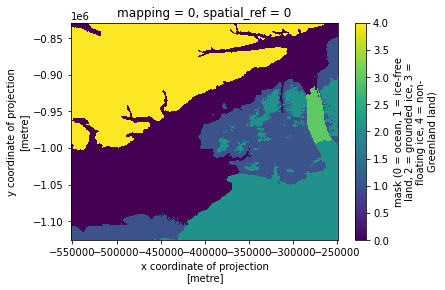

In [45]:
resds.mask.plot()

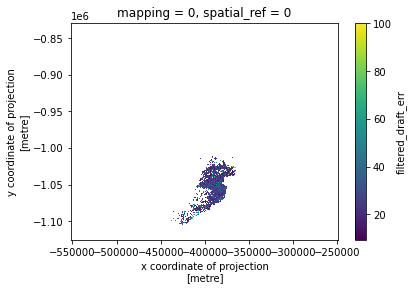

In [28]:
resds.filtered_draft_err.plot()

In [29]:
scrolldem = resds['filtered_draft_err'].hvplot.image(x='x', y='y',datashade=False, rasterize=True, aspect='equal', cmap='magma', dynamic=True,
                       xlabel="x (km)", ylabel="y (km)", colorbar=True) #turn off datashade to see hover values + colorbar
scrolldem

:DynamicMap   []
   :Image   [x,y]   (filtered_draft_err)

Notes:
There are no measurements for much of Kane (in either product)

### Upsample the data and create the contour plot

In [18]:
from matplotlib.colors import LinearSegmentedColormap

In [19]:
%matplotlib inline

In [20]:
resds

<xarray.Dataset>
Dimensions:             (x: 2022, y: 1982)
Coordinates:
  * y                   (y) float64 -8.289e+05 -8.29e+05 ... -1.126e+06
  * x                   (x) float64 -5.521e+05 -5.52e+05 ... -2.49e+05
    mapping             int64 0
    spatial_ref         int64 0
Data variables:
    mask                (y, x) int8 ...
    surface             (y, x) int16 ...
    thickness           (y, x) int16 ...
    bed                 (y, x) int16 ...
    errbed              (y, x) int16 ...
    source              (y, x) int8 ...
    geoid               (y, x) int16 ...
    ibcao_bathy         (y, x) float64 -237.0 -235.7 ... 1.602e+03 1.603e+03
    z                   (y, x) float64 41.0 41.0 41.0 41.0 ... 70.0 70.0 70.0
    filtered_draft_med  (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    filtered_draft_err  (y, x) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    author:                                             Mathieu Morlighem
    cdm_data_type:                                      Grid
    Conventions:                                        CF-1.6
    creator_email:                                      mathieu.morlighem@uci...
    creator_name:                                       Mathieu Morlighem
    Data_citation:                                      Morlighem M. et al., ...
    date_created:                                       20-Sep-2017 09:03:04
    institution:                                        Department of Earth S...
    keywords:                                           0720 Glaciers, 0726 I...
    keywords_vocabulary:                                AGU Index Terms
    license:                                            No restrictions on ac...
    Metadata_Conventions:                               CF-1.6, Unidata Datas...
    no_data:                                            -9999
    nx:                                                 18346
    ny:                                                 10218
    product_version:                                    v3.10
    proj4:                                              +init=epsg:3413
    Projection:                                         Polar Stereographic N...
    spacing:                                            150
    summary:                                            self-consistent bed/b...
    title:                                              BedMachine Greenland
    xmin:                                               -652925
    ymax:                                               -632675
    grid_mapping:                                       mapping
    ibcao_bathy#actual_range:                           [-5590.22070312  6141...
    ibcao_bathy#add_offset:                             0
    ibcao_bathy#coordinates:                            spatial_ref
    ibcao_bathy#grid_mapping:                           spatial_ref
    ibcao_bathy#long_name:                              z
    ibcao_bathy#scale_factor:                           1
    ibcao_bathy#_FillValue:                             nan
    NETCDF_DIM_band_DEF:                                [ 1. 10.]
    NETCDF_DIM_band_VALUES:                             1
    NETCDF_DIM_EXTRA:                                   {band}
    spatial_ref#crs_wkt:                                PROJCRS["WGS 84 / NSI...
    spatial_ref#false_easting:                          0
    spatial_ref#false_northing:                         0
    spatial_ref#geographic_crs_name:                    WGS 84
    spatial_ref#GeoTransform:                           -4060480.1666637915 2...
    spatial_ref#grid_mapping_name:                      polar_stereographic
    spatial_ref#horizontal_datum_name:                  World Geodetic System...
    spatial_ref#inverse_flattening:                     298.257223563
    spatial_ref#longitude_of_prime_meridian:            0
    spatial_ref#prime_meridian_name:                    Greenwich
    spatial_ref#projected_crs_name:           

In [ ]:
# testing code
# all_bathy = resds.filtered_draft_med_rast.where(~np.isnan(resds.filtered_draft_med_rast), other=meas_only)
# all_bathy.hvplot()

In [ ]:
# POTENTIAL NEXT STEPS:
# try doing this in holoviews to see if it is faster (especially to layer the plots) --> not at first attempt
# fix the 0/nodata issue so that it uses the available data to contour where possible (but doesn't contour to 0)
# move this plot creation into plot.py and just run it here to get the output

In [54]:
# generate data for plots - measured and inferred bathymetry
# NOTE: this uses IBCAO because it has the OMG data included, whereas BedMachine v3 does not
interp_meth = "nearest" # with rio.interpolate_na, you can only use nearest right now
# linear and cubic need a fill_value specified, which is ignored with nearest but ends up being passed to
# scipy as "None", thus breaking in scipy.interpolate.ndgriddata.griddata (perhaps in the def fill_value of interpolate.py?).
# However, changing meas_only.rio._nodata doesn't help, and the inputs seem to be fine (plus they work for "nearest")
coarse = 8

# measurements only
obs = -resds.ibcao_bathy.where(resds.z<40).combine_first(-resds.bed.where(resds.source>=10))
meas_only = obs.where(resds.mask==0, other=0)

# inferred points + measured points
all_bathy = resds.filtered_draft_med.where(~np.isnan(resds.filtered_draft_med), 
                                           other=meas_only)

# coarsen and interpolate
# meas_only = meas_only.coarsen(x=coarse, boundary='pad').mean().coarsen(y=coarse, boundary="pad").mean()
meas_only = meas_only.coarsen(x=coarse, y=coarse, boundary='pad').mean()
# meas_only.rio._nodata = np.nan
# meas_only = meas_only.rio.interpolate_na(method=interp_meth)
# all_bathy = all_bathy.coarsen(x=coarse, boundary='pad').mean().coarsen(y=coarse, boundary="pad").mean()
all_bathy = all_bathy.coarsen(x=coarse, y=coarse, boundary='pad').mean()
# all_bathy = all_bathy.rio.interpolate_na(method=interp_meth)

# non-shared plot info
plot_title = 'Kane Basin Bathymetry'
subplot_title = 'sonar measured'

# output filename
fig_name = "bathymetry.png"

#define range of colors for plotting
v=np.linspace(0,600,13)

In [74]:
# generate data for plots - uncertainty on bathymetry
# NOTE: this used BedMachine, because IBCAO doesn't include uncertainties
interp_meth = "nearest" # with rio.interpolate_na, you can only use nearest right now
# linear and cubic need a fill_value specified, which is ignored with nearest but ends up being passed to
# scipy as "None", thus breaking in scipy.interpolate.ndgriddata.griddata (perhaps in the def fill_value of interpolate.py?).
# However, changing meas_only.rio._nodata doesn't help, and the inputs seem to be fine (plus they work for "nearest")
coarse = 8

# measurements only
# obs = -resds.errbed.where(resds.z<40).combine_first(-resds.bed.where(resds.source>=10))
obs = resds.errbed
meas_only = obs.where(resds.mask==0, other=0)

# inferred points + measured points
all_bathy = resds.filtered_draft_err.where(~np.isnan(resds.filtered_draft_err), 
                                           other=meas_only)

# coarsen and interpolate
# meas_only = meas_only.coarsen(x=coarse, boundary='pad').mean().coarsen(y=coarse, boundary="pad").mean()
meas_only = meas_only.coarsen(x=coarse, y=coarse, boundary='pad').mean()
# meas_only.rio._nodata = np.nan
# meas_only = meas_only.rio.interpolate_na(method=interp_meth)
# all_bathy = all_bathy.coarsen(x=coarse, boundary='pad').mean().coarsen(y=coarse, boundary="pad").mean()
all_bathy = all_bathy.coarsen(x=coarse, y=coarse, boundary='pad').mean()
# all_bathy = all_bathy.rio.interpolate_na(method=interp_meth)

# non-shared plot info
plot_title = 'Kane Basin Bathymetry Uncertainty'
subplot_title = 'BedMachine'

# output filename
fig_name = "bathy_uncertainty.png"

#define range of colors for plotting
v=np.linspace(0,300,11)

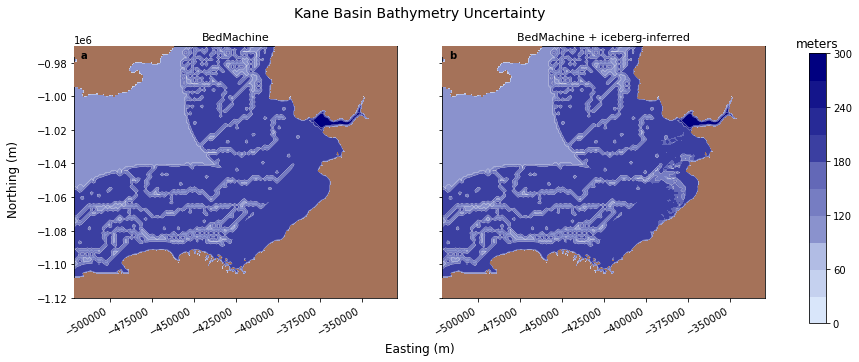

In [75]:
# Note: contouring excludes masked or nan regions (see matplotlib contourf_demo) - an issue for Kane's sparse observations
# the pyinterp library (https://pangeo-pyinterp.readthedocs.io/en/stable/index.html) could provide some help here

loc = ['Kane Basin']
letters=['a','b']

# plt.close(fig)

fig, axes = plt.subplots(1,2, figsize=(12,5)) #8,3

#define range of colors for plotting
# v=np.linspace(0,600,13)  # defined above per-plot
bathy_cmap = LinearSegmentedColormap.from_list('bathy_cmap', [(0.85,0.9,0.98),(0,0,.5)], 12)   #plt.cm.Blues

# left plot (contours from measurements only)
CS = xr.plot.contour(meas_only, x='x', y='y', ax=axes[0], linewidths=0.3, colors=[(0.95,0.95,0.95)], add_labels=False)
CS = xr.plot.contourf(meas_only, x='x', y='y', ax=axes[0], levels=v, cmap=bathy_cmap, add_labels=False)

# right plot: contours from inferred points and measured points
# Note: currently this uses the iceberg-inferred water depth for the entire area of the iceberg, rather than a single point
CS2 = xr.plot.contour(all_bathy, x='x', y='y', ax=axes[1], linewidths=0.3, colors=[(0.95,0.95,0.95)], add_labels=False)
CS2 = xr.plot.contourf(all_bathy, x='x', y='y', ax=axes[1], levels=v, cmap=bathy_cmap, add_labels=False)

# add land and measured bathymetry extent
# plot formatting
landcmap = LinearSegmentedColormap.from_list('land_cmap', [(0.65,0.45,0.35,1),(1,1,1,0)], 2)

xmin, xmax = -500000, -350000
ymin, ymax = -1120000, -970000

for n in range(0,2):
    land = resds.mask.where(resds.mask == 0).fillna(-888).plot.imshow(x='x', y='y', ax=axes[n], cmap=landcmap, zorder=30, add_labels=False)
    land.colorbar.remove()
#     xr.plot.contour(ds.bmach_source, x='x', y='y', ax=axes[n], levels=[0,10,100], linewidths=1, colors='black', add_labels=False)
    
    axes[n].axis('equal')
    axes[n].set_ylim(ymin,ymax)
    axes[n].set_xlim(xmin,xmax)
    
    plt.setp(axes[n].get_xticklabels(), rotation=30, horizontalalignment='right')

# update plot labels, etc.
CS.colorbar.remove()
CS2.colorbar.remove()
cbaxes = fig.add_axes([0.95, 0.1, 0.02, 0.75])
plt.colorbar(CS2, cax=cbaxes)
cbaxes.set_title('meters', fontsize=12)


#turn off y axis labels
axes[1].yaxis.set_ticklabels([])

#label each plot
axes[0].set_title(subplot_title, fontsize=11)
axes[0].text(0.02, 0.95, letters[0], weight='bold', transform=axes[0].transAxes, zorder=40)
axes[1].set_title(subplot_title + ' + iceberg-inferred', fontsize=11)
axes[1].text(0.02, 0.95, letters[1], weight='bold', transform=axes[1].transAxes, zorder=40)

fig.text(0.5, 0.03,'Easting (m)', ha='center', va='center', fontsize=12)
fig.text(0.03, 0.5,'Northing (m)', ha='center', va='center', rotation='vertical', fontsize=12)

plt.suptitle(plot_title, fontsize=14)
fig.subplots_adjust(hspace=0.3, wspace = 0.14, top=0.87, left=0.1, right=0.90, bottom=0.17)


In [76]:
fig_save_path = outdir[:-8] + "project_report(2021)/figures/"
fig.savefig(fig_save_path+fig_name, format='png', dpi=1200)

In [ ]:
gdf.columns

## Visualize the range of elevation (area) values for a single iceberg (DEM)

In [ ]:
vals = gdf[gdf['date'].dt.year.astype(int)==2016].geometry.area

In [ ]:
axHist = plt.subplot()

_ = axHist.hist(vals, np.arange(50000,300000,25000), color="silver")

axHist.set_xlabel('Elevation (m)')
axHist.set_ylabel('Count')
axHist.set_title('DEM Pixel Elevations')

plt.show()